<a href="https://colab.research.google.com/github/codebuzer/codebuzer/blob/main/classification_MLandDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df1 = pd.read_csv("/content/drive/MyDrive/metadata.tsv", sep = '\t')
df2 = pd.read_csv("/content/drive/MyDrive/expmat.tsv", sep = '\t')

In [7]:
dataset = pd.concat([df2.iloc[:,0:],df1.iloc[:,1:]], axis = 1)

In [8]:
X = dataset.drop(['infection'], axis = 1)

In [9]:
y = dataset['infection']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, shuffle = True)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((363, 54), (363,), (121, 54), (121,))

In [13]:
X_train['agenum'].dropna().sample(X_train['agenum'].isnull().sum(),random_state=0)


97     22.0
74     44.0
301    40.0
472    30.0
471    54.0
165    75.0
366    57.0
245    37.0
219    78.0
434    51.0
263    57.0
204    65.0
404    42.0
199    59.0
327    50.0
269    57.0
197    57.0
194    62.0
351    86.0
267    30.0
47     51.0
14     86.0
316    38.0
58     78.0
162    56.0
21     23.0
308    71.0
288    36.0
315    39.0
133    27.0
240    71.0
216    33.0
230    77.0
Name: agenum, dtype: float64

In [14]:
X_test['agenum'].dropna().sample(X_test['agenum'].isnull().sum(),random_state=0)

175    37.0
362    78.0
467    44.0
250    63.0
479    41.0
192    26.0
Name: agenum, dtype: float64

In [15]:
X_train[X_train['agenum'].isnull()].index
#X_test[X_test['agenum'].isnull()].index

Int64Index([424, 420, 346, 314, 354, 109, 429, 422, 139, 349, 369, 416, 123,
            357, 423, 419, 275, 179, 127, 352, 221, 415, 279, 421, 417, 295,
            428, 166, 363, 252, 276, 443, 413],
           dtype='int64')

In [16]:
def impute_nan(df,variable,mode):
    df[variable+"_mode"]=df[variable].fillna(mode)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the nan value
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [28]:
#mode=X_train.agenum.mode()
mode=X_test.agenum.mode()


In [29]:
#impute_nan(X_train,"agenum",mode)
impute_nan(X_test,"agenum",mode)


In [30]:
#X_test.head()
X_train.head()

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V44,V45,V46,V47,V48,V49,V50,batch,agenum_random,ctnum_random
397,GSM4602639,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,...,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,L,50.0,22.81
57,GSM4602298,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,...,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,Q,62.0,19.35
286,GSM4602527,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,...,0.122401,0.079855,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,D,72.0,21.34
132,GSM4602373,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,...,0.007655,-0.186151,-0.235243,-0.019517,-0.233459,0.179042,0.272707,N,30.0,25.36
406,GSM4602648,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,...,-0.066818,-0.118973,0.001721,0.051858,-0.027145,0.207186,0.133435,M,35.0,24.41


In [31]:
#mode=X_train.ctnum.mode()
mode=X_test.ctnum.mode()
mode

0    20.24
1    25.43
dtype: float64

In [32]:
impute_nan(X_test,"ctnum",mode)
#impute_nan(X_train,"ctnum",mode)


In [33]:
X_train.head()
#X_test.head()

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V44,V45,V46,V47,V48,V49,V50,batch,agenum_random,ctnum_random
397,GSM4602639,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,...,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,L,50.0,22.81
57,GSM4602298,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,...,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,Q,62.0,19.35
286,GSM4602527,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,...,0.122401,0.079855,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,D,72.0,21.34
132,GSM4602373,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,...,0.007655,-0.186151,-0.235243,-0.019517,-0.233459,0.179042,0.272707,N,30.0,25.36
406,GSM4602648,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,...,-0.066818,-0.118973,0.001721,0.051858,-0.027145,0.207186,0.133435,M,35.0,24.41


In [34]:
X_test.isnull().sum()
#X_train.isnull().sum()


rowname           0
V1                0
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0
V8                0
V9                0
V10               0
V11               0
V12               0
V13               0
V14               0
V15               0
V16               0
V17               0
V18               0
V19               0
V20               0
V21               0
V22               0
V23               0
V24               0
V25               0
V26               0
V27               0
V28               0
V29               0
V30               0
V31               0
V32               0
V33               0
V34               0
V35               0
V36               0
V37               0
V38               0
V39               0
V40               0
V41               0
V42               0
V43               0
V44               0
V45               0
V46               0
V47               0
V48               0
V49               0


In [24]:
#X_train = X_train.drop(['agenum','ctnum','agenum_mode','ctnum_mode'], axis = 1)


In [35]:
X_test = X_test.drop(['agenum','ctnum','agenum_mode','ctnum_mode'], axis = 1)

In [36]:
X_test.isnull().sum()

rowname          0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
V29              0
V30              0
V31              0
V32              0
V33              0
V34              0
V35              0
V36              0
V37              0
V38              0
V39              0
V40              0
V41              0
V42              0
V43              0
V44              0
V45              0
V46              0
V47              0
V48              0
V49              0
V50              0
batch            0
agenum_rando

In [27]:
X_train.isnull().sum()

rowname          0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
V29              0
V30              0
V31              0
V32              0
V33              0
V34              0
V35              0
V36              0
V37              0
V38              0
V39              0
V40              0
V41              0
V42              0
V43              0
V44              0
V45              0
V46              0
V47              0
V48              0
V49              0
V50              0
batch            0
agenum_rando

In [37]:
X_train = pd.get_dummies(X_train,columns = ['batch'])

In [38]:
X_test = pd.get_dummies(X_test,columns = ['batch'])

In [39]:
def median_status(value):
    if value <= X_train['ctnum_random'].median():
        return 0
    else:
        return 1

X_train['ctnum_median_status'] = X_train['ctnum_random'].map(median_status)

In [40]:
def median_status(value):
    if value <= X_test['ctnum_random'].median():
        return 0
    else:
        return 1

X_test['ctnum_median_status'] = X_test['ctnum_random'].map(median_status)


In [41]:
X_train = X_train.drop(['batch_D'], axis = 1)

In [42]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from collections import Counter
# summarize class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 326, 0: 37})


In [44]:
X_train = X_train.drop(['rowname'], axis = 1)
X_test = X_test.drop(['rowname'], axis = 1)


In [45]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [46]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((652, 73), (652,), (121, 73), (121,))

In [47]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.0)
var_thres.fit(X_train)

VarianceThreshold()

In [48]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [49]:
X_train.columns[var_thres.get_support()]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'agenum_random', 'ctnum_random', 'batch_A', 'batch_B', 'batch_C',
       'batch_E', 'batch_F', 'batch_G', 'batch_H', 'batch_I', 'batch_J',
       'batch_K', 'batch_L', 'batch_M', 'batch_N', 'batch_O', 'batch_P',
       'batch_Q', 'batch_R', 'batch_S', 'batch_T', 'batch_U',
       'ctnum_median_status'],
      dtype='object')

In [50]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [51]:
for feature in constant_columns:
     print(feature)

In [52]:
X_train.drop(constant_columns,axis=1)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,0,0,0,0,0,0,0,0,0,1
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0,0,0,0,1,0,0,0,0,0
2,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0,0,0,0,0,0,0,0,0,1
3,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,0,1,0,0,0,0,0,0,0,1
4,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,-0.171013,0.087216,0.206897,0.039056,-0.060192,0.118116,-0.175574,0.298499,-0.104304,0.142772,...,0,0,0,0,0,0,0,0,0,0
648,0.162784,0.009686,0.151152,0.090114,0.120426,-0.028848,-0.085032,0.112072,-0.198820,0.006043,...,0,0,0,0,0,0,0,0,0,1
649,-0.103324,0.071491,0.133105,-0.145933,0.256185,-0.038493,-0.280322,0.191867,-0.132679,-0.023439,...,0,0,0,0,0,0,0,0,0,0
650,0.186898,0.195878,0.304725,-0.269202,0.233375,0.156588,-0.263068,0.212328,-0.086475,0.066513,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_train.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
V1,1.000000,0.660951,0.351191,0.082064,0.149419,0.411593,0.748103,-0.031791,0.078362,0.679415,...,-0.020395,-0.021310,-0.009927,0.026334,0.104374,-0.022247,0.030001,0.000592,-0.074509,-0.054043
V2,0.660951,1.000000,0.699806,0.282432,0.522557,0.640253,0.321470,0.493973,0.195940,0.764641,...,-0.081500,-0.021099,0.002085,0.023812,0.075979,-0.155496,0.184176,-0.023854,0.149125,-0.108959
V3,0.351191,0.699806,1.000000,0.245288,0.569287,0.561501,-0.014460,0.578395,0.067296,0.597795,...,-0.104291,-0.037805,-0.052239,-0.003432,0.008966,-0.198462,0.293130,-0.007309,0.166479,-0.132910
V4,0.082064,0.282432,0.245288,1.000000,0.150266,0.679119,0.148224,0.373986,0.731075,0.459526,...,-0.062462,0.099754,0.065369,0.091760,0.051709,-0.009299,0.088165,-0.113097,-0.033077,-0.008972
V5,0.149419,0.522557,0.569287,0.150266,1.000000,0.297034,-0.161165,0.650908,0.117989,0.422711,...,-0.112062,-0.016771,-0.021567,-0.045108,0.017257,-0.262189,0.325111,-0.017271,0.210647,-0.070107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
batch_R,-0.022247,-0.155496,-0.198462,-0.009299,-0.262189,-0.086384,0.022920,-0.231810,-0.028042,-0.270635,...,-0.037427,-0.034374,-0.045461,-0.067083,-0.069724,1.000000,-0.066185,-0.029246,-0.072294,-0.127103
batch_S,0.030001,0.184176,0.293130,0.088165,0.325111,0.158835,-0.132811,0.327667,0.071392,0.192526,...,-0.035977,-0.033042,-0.043700,-0.064485,-0.067024,-0.066185,1.000000,-0.028113,-0.069494,0.080967
batch_T,0.000592,-0.023854,-0.007309,-0.113097,-0.017271,-0.125241,0.003042,0.044935,-0.090875,-0.008579,...,-0.015897,-0.014601,-0.019310,-0.028494,-0.029616,-0.029246,-0.028113,1.000000,-0.030708,-0.018021
batch_U,-0.074509,0.149125,0.166479,-0.033077,0.210647,0.008554,-0.173654,0.243033,-0.080236,0.117479,...,-0.039297,-0.036092,-0.047733,-0.070436,-0.073210,-0.072294,-0.069494,-0.030708,1.000000,0.012580


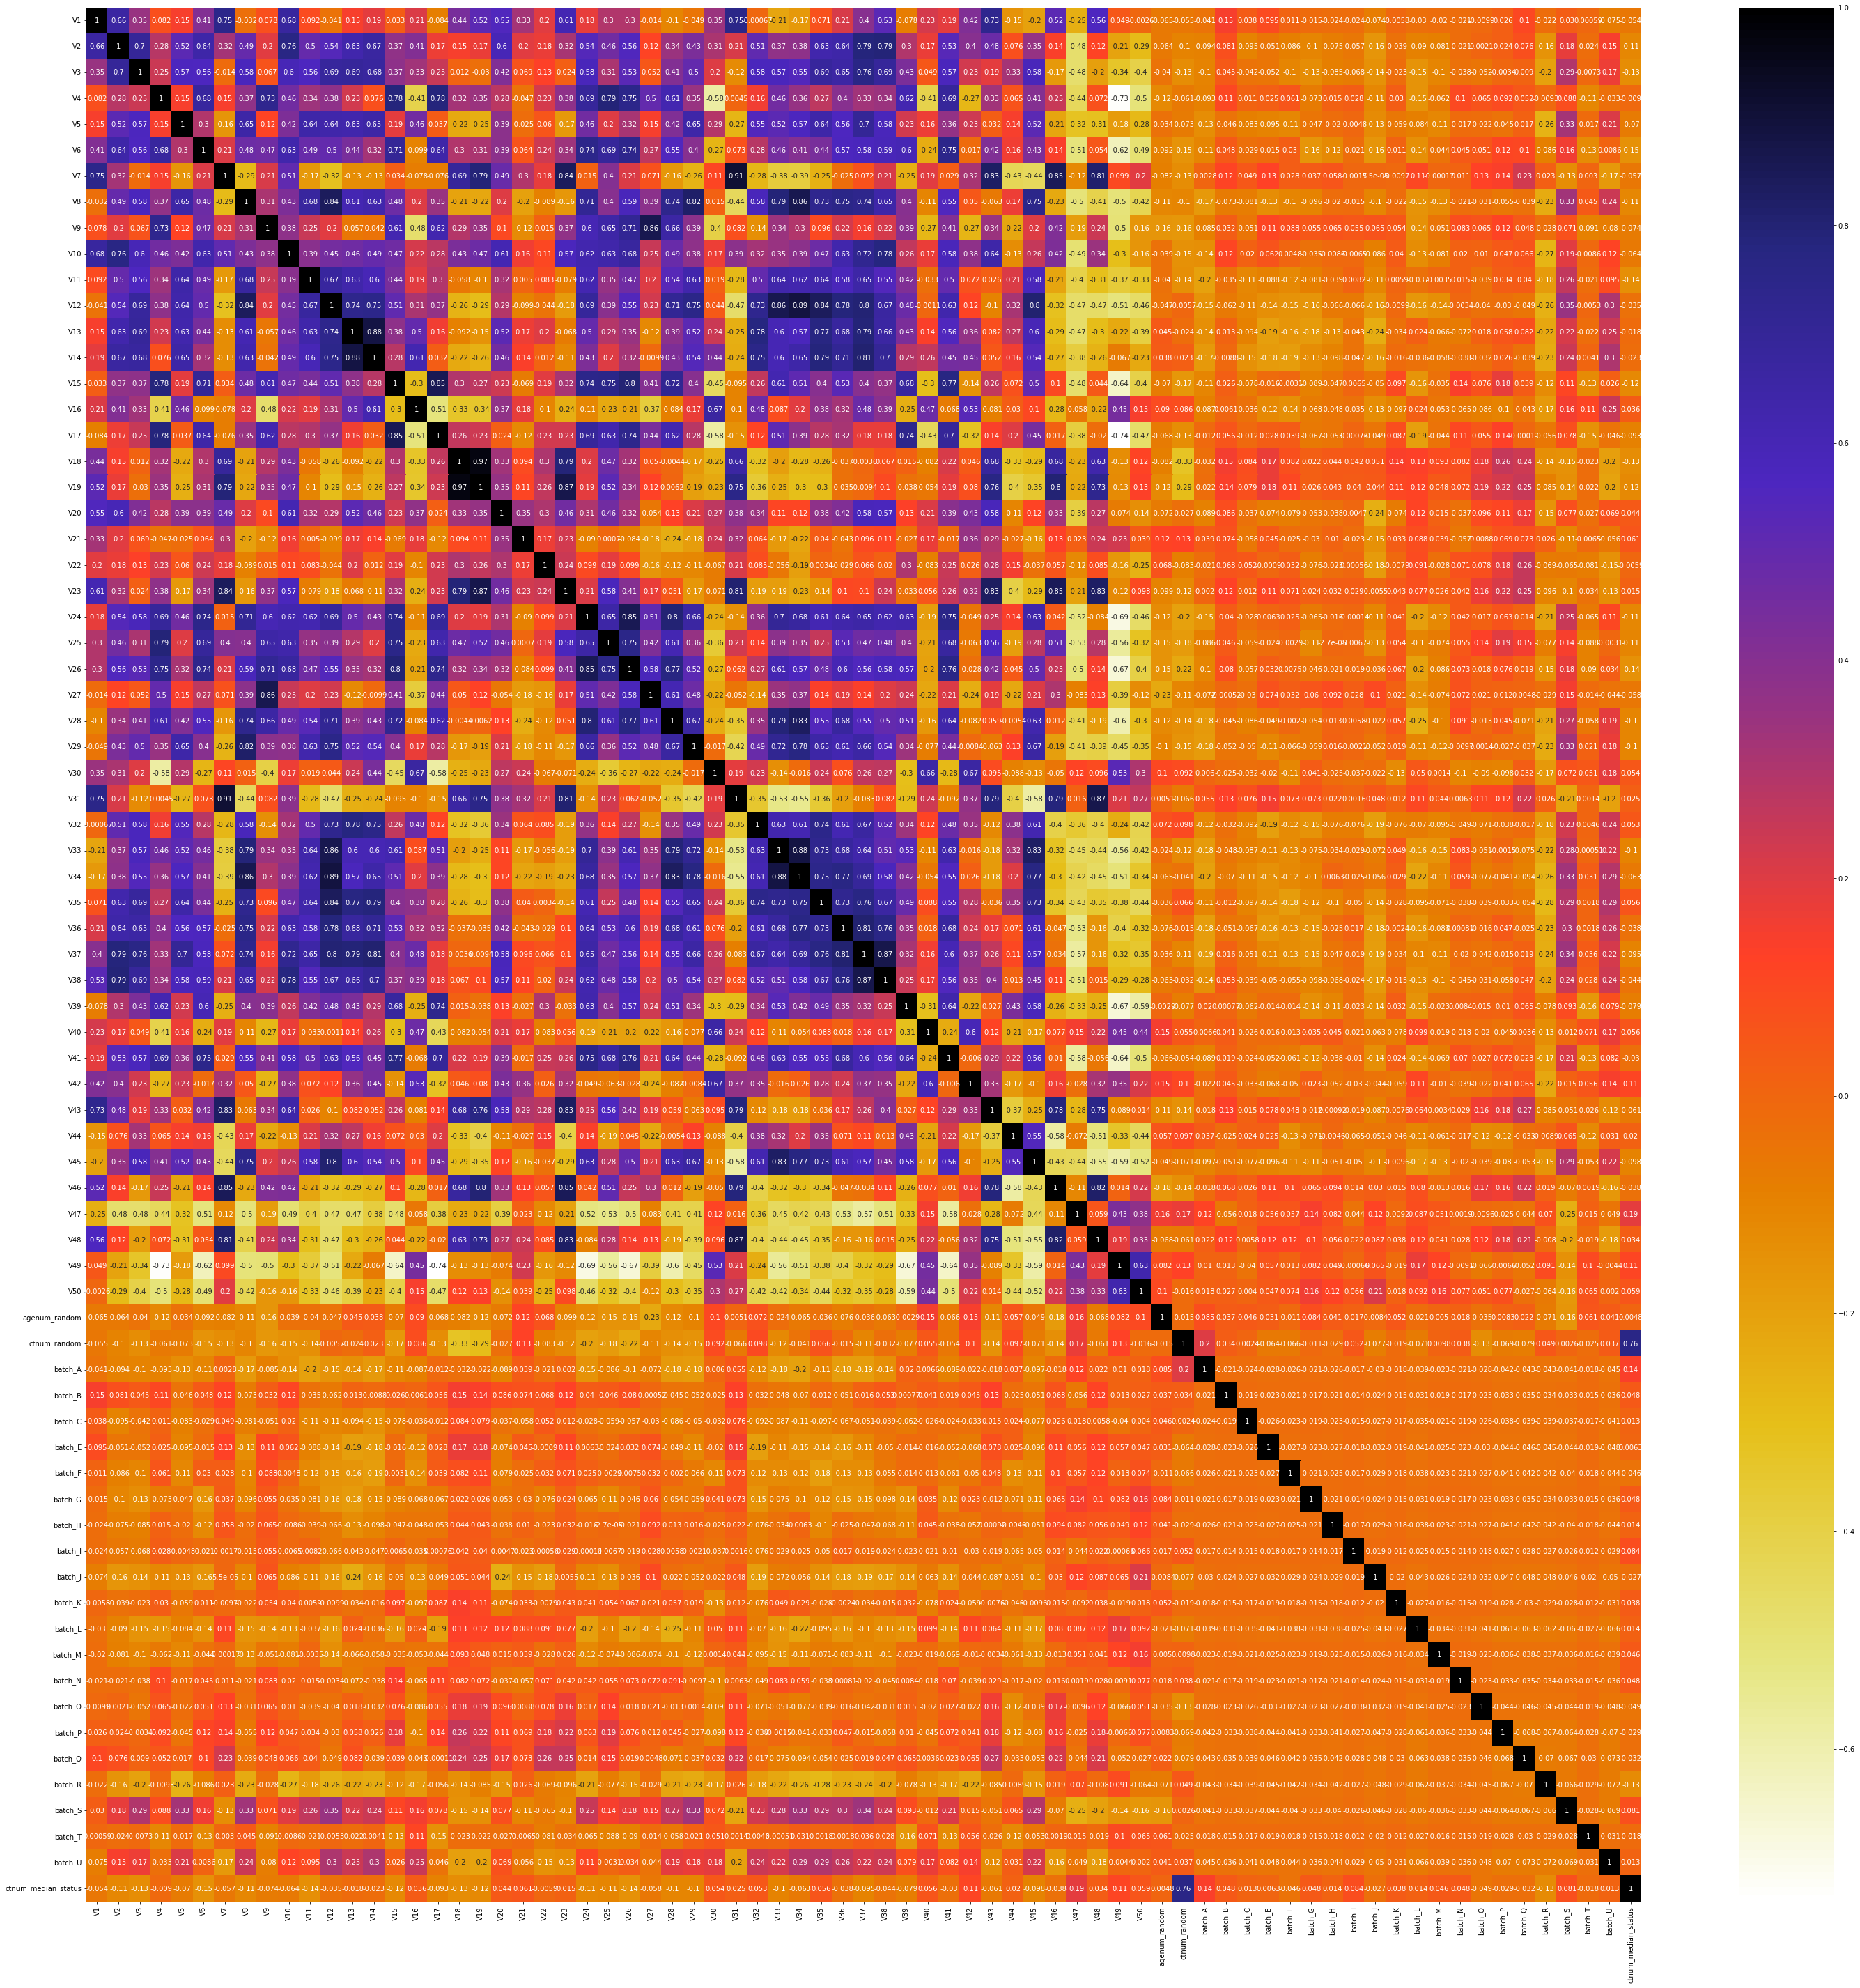

In [54]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(50,50))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [55]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [56]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))
corr_features

{'V14', 'V17', 'V19', 'V23', 'V26', 'V27', 'V31', 'V33', 'V34', 'V38', 'V48'}

In [57]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [58]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.07660738, 0.0797637 , 0.11390275, 0.05783885, 0.05566227,
       0.08988995, 0.06848306, 0.12758737, 0.07957755, 0.11000686,
       0.05541067, 0.19242794, 0.08764637, 0.07597062, 0.08718677,
       0.27660231, 0.05446595, 0.09125017, 0.14352085, 0.05512755,
       0.05039795, 0.04107922, 0.05171943, 0.08071175, 0.17997848,
       0.16256673, 0.12035619, 0.09919544, 0.07014257, 0.04122675,
       0.04523389, 0.06155984, 0.13746696, 0.08861745, 0.13620966,
       0.1089678 , 0.0599067 , 0.06201308, 0.09614701, 0.26528565,
       0.02170825, 0.00404683, 0.00667152, 0.06716625, 0.02632797,
       0.01663076, 0.00372314, 0.05470773, 0.01654175, 0.01987929,
       0.0481358 , 0.00789764, 0.00746528, 0.01393474, 0.03329623,
       0.04817971, 0.04228973, 0.03333353, 0.07443225, 0.00747618,
       0.02988551, 0.02725762])

In [59]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

V18              0.276602
agenum_random    0.265286
V12              0.192428
V32              0.179978
V35              0.162567
                   ...   
batch_T          0.007476
batch_M          0.007465
batch_B          0.006672
batch_A          0.004047
batch_G          0.003723
Length: 62, dtype: float64

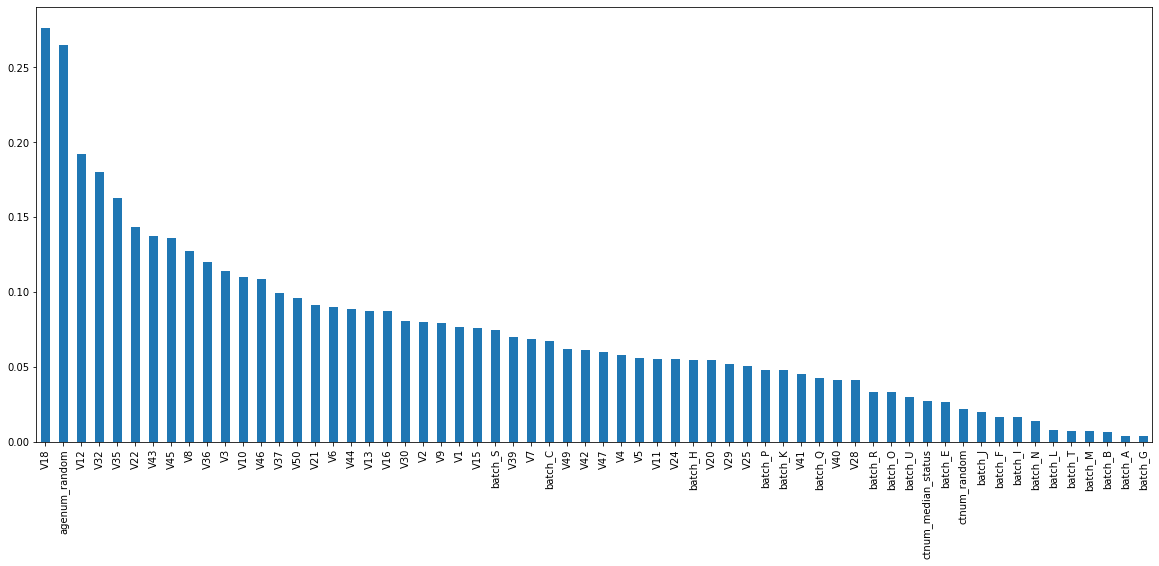

In [60]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [61]:
X_train = X_train.drop(['batch_G'], axis = 1)
X_test = X_test.drop(['batch_G'], axis = 1)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((652, 61), (121, 61), (652,), (121,))

In [63]:
!pip install Xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score,precision_score,f1_score
import xgboost as xgb

In [65]:
scaler = StandardScaler()

In [66]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.80529363,  1.33356159,  0.28139203, ...,  8.97217922,
        -0.27551332,  1.09329145],
       [ 0.98579189,  1.51178276,  1.60345297, ..., -0.11145564,
        -0.27551332, -0.91466919],
       [-1.39518678, -0.31963468,  0.07876344, ..., -0.11145564,
        -0.27551332, -0.91466919],
       ...,
       [ 0.55525535, -0.08084054,  0.5516147 , ..., -0.11145564,
        -0.27551332, -0.91466919],
       [-1.26945011, -2.36713826, -2.76435759, ..., -0.11145564,
        -0.27551332,  1.09329145],
       [ 2.19168818,  1.08631203, -0.10002545, ..., -0.11145564,
        -0.27551332, -0.91466919]])

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred_lr = lr.predict(X_test)

In [70]:
from sklearn.metrics import *

In [71]:
acc_lr = accuracy_score(y_test,y_pred_lr)

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [73]:
acc_dt = accuracy_score(y_test,y_pred_dt)

In [74]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


In [75]:
acc_nb = accuracy_score(y_test,y_pred_nb)

In [76]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [77]:
acc_rf = accuracy_score(y_test,y_pred_rf)

In [78]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [79]:
y_pred_xg = xgb.predict(X_test)

In [80]:
acc_xg = accuracy_score(y_test,y_pred_xg)

In [81]:
model = Sequential()
model.add(Dense(60, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 2s 32ms/step - loss: 1.0447 - accuracy: 0.4357 - val_loss: 1.0962 - val_accuracy: 0.0000e+00
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6863 - accuracy: 0.6257 - val_loss: 1.2525 - val_accuracy: 0.0000e+00
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6541 - accuracy: 0.6257 - val_loss: 0.8678 - val_accuracy: 0.0000e+00
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 0.6467 - accuracy: 0.6238 - val_loss: 0.9216 - val_accuracy: 0.0076
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.6374 - accuracy: 0.6296 - val_loss: 1.0167 - val_accuracy: 0.0382
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.6219 - accuracy: 0.6660 - val_loss: 0.8250 - val_accuracy: 0.2595
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 0.5944 - accuracy: 0.6987 - val_loss: 0.7950 - val_accuracy: 0.3130

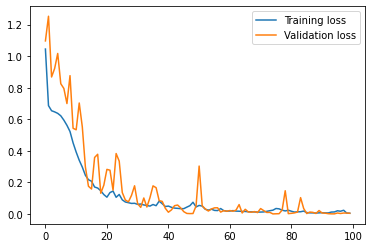

In [84]:
#plt.plot(history.history['accuracy'], label = "Train Accuracy")
#plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [85]:
y_pred_prob = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [86]:
y_pred_mlp = np.array([ 1 if i > 0.5 else 0 for i in y_pred_prob]) 

In [87]:
acc_mlp = accuracy_score(y_true = y_test, y_pred = y_pred_mlp)
con_mlp = confusion_matrix(y_true = y_test, y_pred = y_pred_mlp)
f1_mlp = f1_score(y_true = y_test, y_pred = y_pred_mlp)
rec_mlp = recall_score(y_true = y_test, y_pred = y_pred_mlp)
pre_mlp = precision_score(y_test,y_pred_mlp)
auc_mlp = roc_auc_score(y_test, y_pred_prob)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, y_pred_prob)

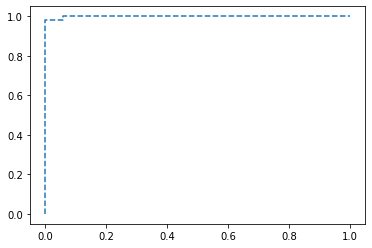

In [88]:
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP prediction (AUROC = %0.3f)' % auc_mlp)

In [89]:
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, y_pred_prob)

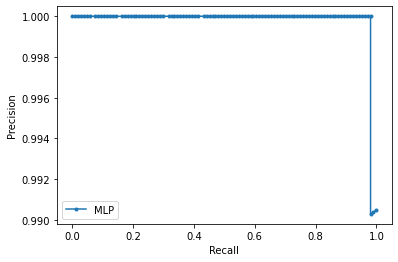

In [90]:
plt.figure(figsize=(6,4))
plt.plot(mlp_recall, mlp_precision, marker='.', label='MLP')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [91]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred_lr
result['Decision Tree Prediction'] = y_pred_dt
result['Naive bayes Prediction'] = y_pred_nb
result['Random forest Prediction'] = y_pred_rf
result['XgBoost Prediction'] = y_pred_xg
result['MLP Prediction'] = y_pred_mlp

In [92]:
#print('Precision score of Logistic regression' ,
pre_lr = precision_score(y_test,y_pred_lr)
#print('Precision score of Naive Bayes' ,
pre_nb = precision_score(y_test,y_pred_nb)
#print('Precision score of Random Forest' ,
pre_rf = precision_score(y_test,y_pred_rf)
#print('Precision score of Decision Tree' ,
pre_dt = precision_score(y_test,y_pred_dt)
#print('Precision score of XgBoost' ,
pre_xg = precision_score(y_test,y_pred_xg)
pre_mlp = precision_score(y_test,y_pred_mlp)

In [93]:
#print('Recall of Logistic Regression',
rec_lr = recall_score(y_test,y_pred_lr)
#print('Recall of Naive Bayes',
rec_nb =  recall_score(y_test,y_pred_nb)
#print('Recall of Random Forest',
rec_rf =  recall_score(y_test,y_pred_rf)
#print('Recall of Decision Tree',
rec_dt =  recall_score(y_test,y_pred_dt)
#print('Recall of XgBoost',
rec_xg =  recall_score(y_test,y_pred_xg)
rec_mlp =  recall_score(y_test,y_pred_mlp)

In [94]:
#print('Recall of Logistic Regression',
f1_lr = f1_score(y_test,y_pred_lr)
#print('Recall of Naive Bayes',
f1_nb =  f1_score(y_test,y_pred_nb)
#print('Recall of Random Forest',
f1_rf =  f1_score(y_test,y_pred_rf)
#print('Recall of Decision Tree',
f1_dt =  f1_score(y_test,y_pred_dt)
#print('Recall of XgBoost',
f1_xg =  f1_score(y_test,y_pred_xg)
f1_mlp =  f1_score(y_test,y_pred_mlp)

In [95]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
xg_probs = xgb.predict_proba(X_test)
lr_probs = lr.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)
#mlp_probs = model.predict_proba(X_test)

In [96]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]
lr_probs = lr_probs[:, 1]
xg_probs = xg_probs[:, 1]

In [97]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
xg_auc = roc_auc_score(y_test, xg_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
lr_auc = roc_auc_score(y_test, lr_probs)


In [98]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

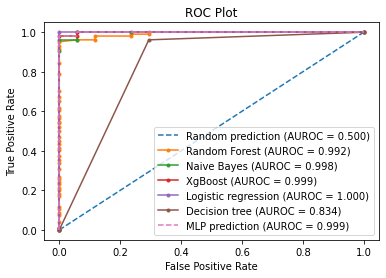

In [99]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(xg_fpr, xg_tpr, marker='.', label='XgBoost (AUROC = %0.3f)' % xg_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression (AUROC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision tree (AUROC = %0.3f)' % dt_auc)
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP prediction (AUROC = %0.3f)' % auc_mlp)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [102]:
result = pd.DataFrame()
result['Algorithm'] = ['XgBoost','RandomForest','DecisionTree','LogisticRegression', 'Naive bayes', 'Multilayer perceptron']
result['Accuracy score'] = [acc_xg,acc_rf,acc_dt,acc_lr,acc_nb,acc_mlp]
result['Precision'] = [pre_xg,pre_rf,pre_dt,pre_lr,pre_nb,pre_mlp]
result['Recall'] = [rec_xg,rec_rf,rec_dt,rec_lr,rec_nb,rec_mlp]
result['F1 score'] = [f1_xg,f1_rf,f1_dt,f1_lr,f1_nb,f1_mlp]
result['AUROC'] = [xg_auc,rf_auc,dt_auc,lr_auc,nb_auc, auc_mlp]

In [101]:
result

,Algorithm,Accuracy score,Precision,Recall,F1 score,AUCROC
0,XgBoost,0.966942,1.000000,0.961538,0.980392,0.998869
1,RandomForest,0.966942,0.980769,0.980769,0.980769,0.992364
2,DecisionTree,0.925620,0.952381,0.961538,0.956938,0.833710
3,LogisticRegression,0.983471,1.000000,0.980769,0.990291,1.000000
4,Naive bayes,0.925620,1.000000,0.913462,0.954774,0.997738
5,Multilayer perceptron,0.983471,1.000000,0.980769,0.990291,0.998869
